In [6]:
#-- Draw anomalies for 1997 and 1998
# idir = "/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/20*.nc"
%matplotlib inline
import os
import pandas as pd
from netCDF4 import  num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

import os
os.getcwd()

%cd /home/599/ars599/Documents/a10/

import glob
print(glob.glob("/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-1899??_mon.nc"))


/home/599/ars599/Documents/a10
['/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189905_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189910_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189903_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189901_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189904_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189902_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189911_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189909_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-189907_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/HI-02.pa-1899

In [7]:
# method two large chunk issue
import glob
import xarray as xr
from datetime import datetime

import netCDF4

# List all matching files
idir = '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-02/history/atm/netCDF/'
nfile = ('*_mon.nc')
file = idir+nfile

# pr: fld_s05i216
# ts: fld_s00i024

#fn = 'pr_HI-02_output.nc'
#vTmp = xr.open_mfdataset(file, combine='nested', concat_dim="time")['fld_s05i216']
#vTmp.to_netcdf(fn) # Export netcdf file
#print("=== I Jo ===")

In [23]:
# method three
idir = '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/'

for yr in range(1850,1900):
    file = idir + 'HI-00.pa-%04d??_mon.nc' % yr
    fn = 'pr_HI-00-%04d_output.nc' % yr
    vTmp = xr.open_mfdataset(file, combine='nested', concat_dim="time")['fld_s05i216']
    vTmp.to_netcdf(fn) # Export netcdf file


file = 'pr_HI-00-*_output.nc' 
fn = 'pr_HI-00_output.nc'

vTmp = xr.open_mfdataset(file, combine='nested', concat_dim="time")
vTmp.to_netcdf(fn) # Export netcdf file

print("=== I Jo ===")

=== I Jo ===


In [26]:
idir = '/g/data/access/access_amos22/archive/'
ext1 = idir+"sst_HI-00_output.nc"
ext2 = idir+"sst_HI-02_output.nc"
ext3 = idir+"pr_HI-00_output.nc"
ext4 = idir+"pr_HI-02_output.nc"

sst1 = xr.open_dataset(ext1)['fld_s00i024']
sst2 = xr.open_dataset(ext2)['fld_s00i024']
pr1 = xr.open_dataset(ext3)['fld_s05i216']
pr2 = xr.open_dataset(ext4)['fld_s05i216']


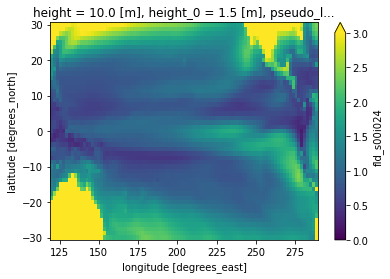

In [33]:
latS = -30.
latN = 30.
lonW = 120.
lonE = 290

sst_diff = sst1.sel(time='1885-06-16') - sst2.sel(time='1885-06-16')
sst2.sel(lat=slice(latS, latN), lon=slice(lonW, lonE)).std(axis=0).plot(vmin=0,vmax=3)

/local/p66/ars599/tmp/ipykernel_3590316/4082565194.py:8: UserWarning: linewidths is ignored by contourf
  plt.contourf(sst_diff.lon, sst_diff.lat,


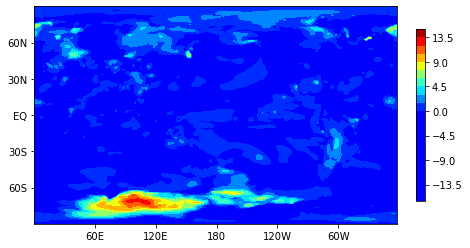

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr

levs = np.arange(16, 29, 0.05)
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
cm = clr.LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))
fig = plt.figure(figsize = (7, 4))
plt.contourf(sst_diff.lon, sst_diff.lat,
             sst_diff.squeeze(),
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(60, 350, 60), ['60E', '120E', '180', '120W', '60W'])
plt.yticks(np.arange(-60, 90, 30), ['60S', '30S', 'EQ', '30N', '60N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()

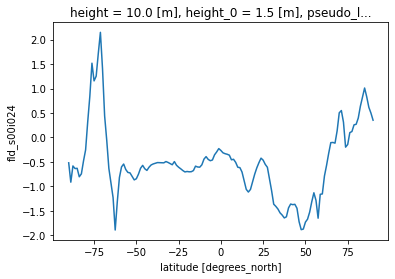

In [35]:
sst_time_and_zonal_mean = sst_diff.mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()

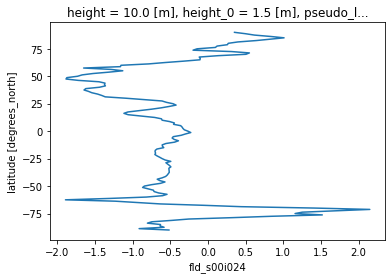

In [36]:
# some might prefer to have lat on the y axis
sst_time_and_zonal_mean.plot(y='lat')

In [37]:
# -- regional average
def wgt_areaave(indat, latS, latN, lonW, lonE):
  lat=indat.lat
  lon=indat.lon

  if ( ((lonW < 0) or (lonE < 0 )) and (lon.values.min() > -1) ):
     anm=indat.assign_coords(lon=( (lon + 180) % 360 - 180) )
     lon=( (lon + 180) % 360 - 180)
  else:
     anm=indat

  iplat = lat.where( (lat >= latS ) & (lat <= latN), drop=True)
  iplon = lon.where( (lon >= lonW ) & (lon <= lonE), drop=True)

#  print(iplat)
#  print(iplon)
  wgt = np.cos(np.deg2rad(lat))
  odat=anm.sel(lat=iplat,lon=iplon).weighted(wgt).mean(("lon", "lat"), skipna=True)
  return(odat)

# -- correlation and covariance
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

/local/p66/ars599/tmp/ipykernel_3590316/3255560618.py:10: UserWarning: linewidths is ignored by contourf
  plt.contourf(sst_cor.lon, sst_cor.lat,


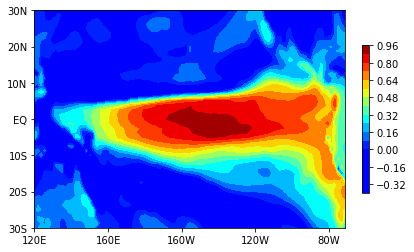

In [42]:
# Nino34 correlation from HI-00
sst_clim = sst1.groupby('time.month').mean(dim='time')
sst_anom = sst1.groupby('time.month') - sst_clim
sst_anom = sst_anom.sel(lat=slice(latS, latN), lon=slice(lonW, lonE))

# calculate n34 and correlation plot
n34 = wgt_areaave(sst_anom, -5, 5, 190, 240)
sst_cor = corrrelation(sst_anom, n34, dims='time')

plt.contourf(sst_cor.lon, sst_cor.lat,
             sst_cor,
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(120, 320, 40), ['120E', '160E', '160W', '120W', '80W'])
plt.yticks(np.arange(-30, 40, 10), ['30S', '20S', '10S', 'EQ', '10N', '20N', '30N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()


/local/p66/ars599/tmp/ipykernel_3590316/54044620.py:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(corr.lon, corr.lat,


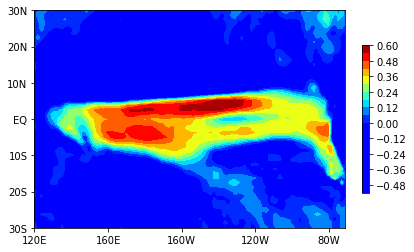

In [43]:
# Nino34 correlation prec from HI-02
pr_clim = pr1.groupby('time.month').mean(dim='time')
pr_anom = pr1.groupby('time.month') - pr_clim
pr_anom = pr_anom.sel(lat=slice(latS, latN), lon=slice(lonW, lonE))

# calculate n34 and correlation plot
corr = corrrelation(pr_anom, n34, dims='time')

plt.contourf(corr.lon, corr.lat,
             corr,
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(120, 320, 40), ['120E', '160E', '160W', '120W', '80W'])
plt.yticks(np.arange(-30, 40, 10), ['30S', '20S', '10S', 'EQ', '10N', '20N', '30N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()

/local/p66/ars599/tmp/ipykernel_3590316/545974058.py:10: UserWarning: linewidths is ignored by contourf
  plt.contourf(sst_cor.lon, sst_cor.lat,


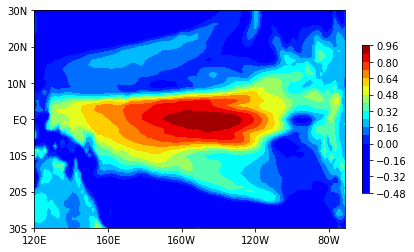

In [39]:
# Nino34 correlation from HI-02
sst_clim = sst2.groupby('time.month').mean(dim='time')
sst_anom = sst2.groupby('time.month') - sst_clim
sst_anom = sst_anom.sel(lat=slice(latS, latN), lon=slice(lonW, lonE))

# calculate n34 and correlation plot
n34 = wgt_areaave(sst_anom, -5, 5, 190, 240)
sst_cor = corrrelation(sst_anom, n34, dims='time')

plt.contourf(sst_cor.lon, sst_cor.lat,
             sst_cor,
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(120, 320, 40), ['120E', '160E', '160W', '120W', '80W'])
plt.yticks(np.arange(-30, 40, 10), ['30S', '20S', '10S', 'EQ', '10N', '20N', '30N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()


/local/p66/ars599/tmp/ipykernel_3590316/4279354820.py:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(corr.lon, corr.lat,


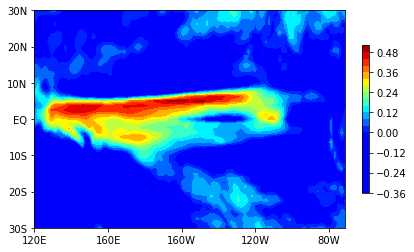

In [40]:
# Nino34 correlation prec from HI-02
pr_clim = pr2.groupby('time.month').mean(dim='time')
pr_anom = pr2.groupby('time.month') - pr_clim
pr_anom = pr_anom.sel(lat=slice(latS, latN), lon=slice(lonW, lonE))

# calculate n34 and correlation plot
corr = corrrelation(pr_anom, n34, dims='time')

plt.contourf(corr.lon, corr.lat,
             corr,
             levels = 20, linewidths = 1, vmin = 0, cmap = cm)
plt.xticks(np.arange(120, 320, 40), ['120E', '160E', '160W', '120W', '80W'])
plt.yticks(np.arange(-30, 40, 10), ['30S', '20S', '10S', 'EQ', '10N', '20N', '30N'])
cbar=plt.colorbar(fraction=0.022)
plt.show()
